In [1]:
import numpy as np
import pandas as pd
from seaborn import load_dataset, heatmap, boxplot
import matplotlib.pyplot as plt

In [2]:
data = load_dataset('mpg')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
data = data.drop(columns=['origin','name'])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [4]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [5]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [6]:
data.isin(['',' ','-']).sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

In [7]:
from scipy.stats import shapiro

In [8]:
stats, p_value = shapiro(data['horsepower'].dropna())
p_value

5.0220692907916354e-15

p-value < 0.05, so we will replace the missing values with median.

In [9]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


We'll remove some attributes that are highly correlated to others.

In [10]:
data.loc[data['horsepower'].isna(),'horsepower'] = np.median(data['horsepower'].dropna())
data['horsepower'].isna().sum()

0

<Axes: >

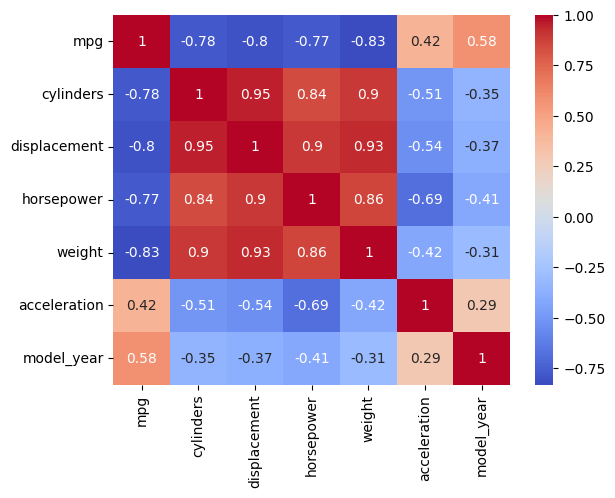

In [11]:
heatmap(data.corr(),cmap='coolwarm',annot=True)

<Axes: >

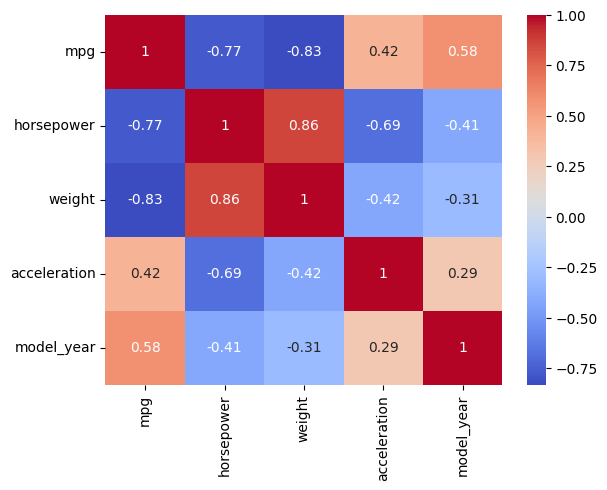

In [12]:
heatmap(data.drop(columns=['displacement','cylinders']).corr(),cmap='coolwarm',annot=True)

In [13]:
data = data.drop(columns=['displacement','cylinders'])
data

,mpg,horsepower,weight,acceleration,model_year
0,18.0,130.0,3504,12.0,70
1,15.0,165.0,3693,11.5,70
2,18.0,150.0,3436,11.0,70
3,16.0,150.0,3433,12.0,70
4,17.0,140.0,3449,10.5,70
...,...,...,...,...,...
393,27.0,86.0,2790,15.6,82
394,44.0,52.0,2130,24.6,82
395,32.0,84.0,2295,11.6,82
396,28.0,79.0,2625,18.6,82


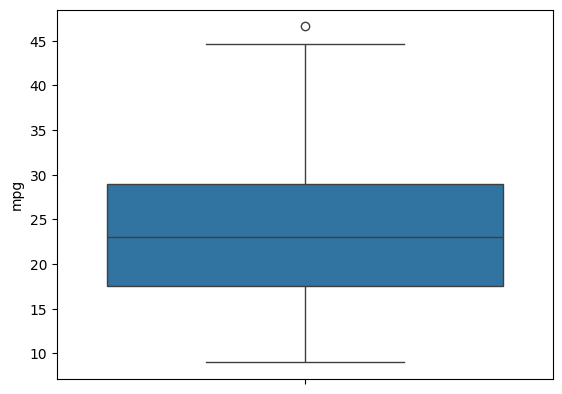

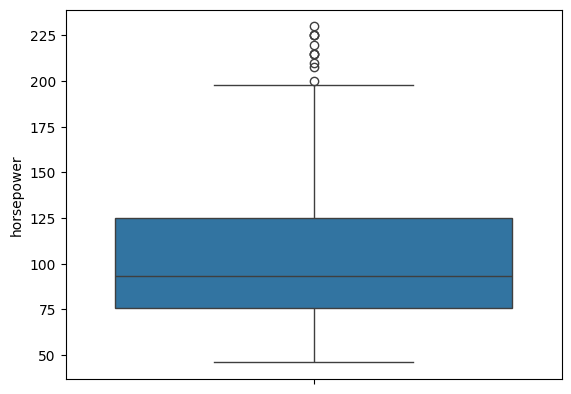

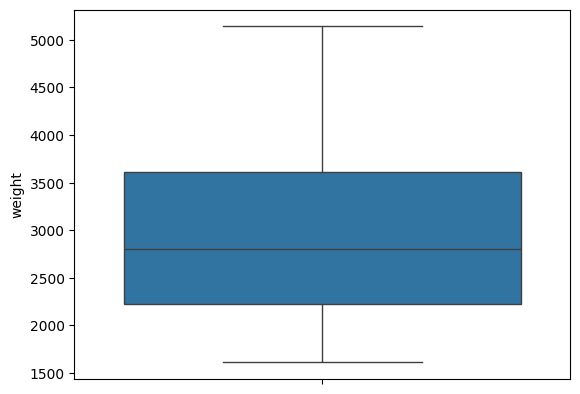

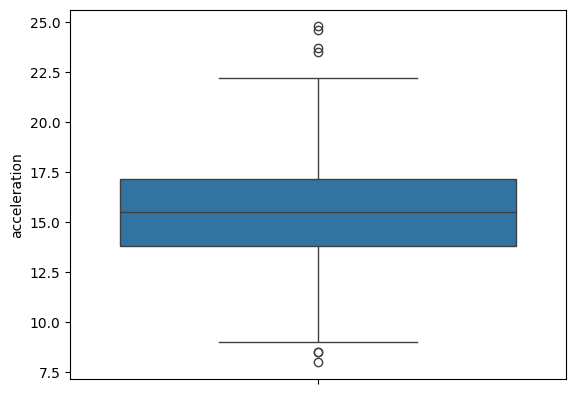

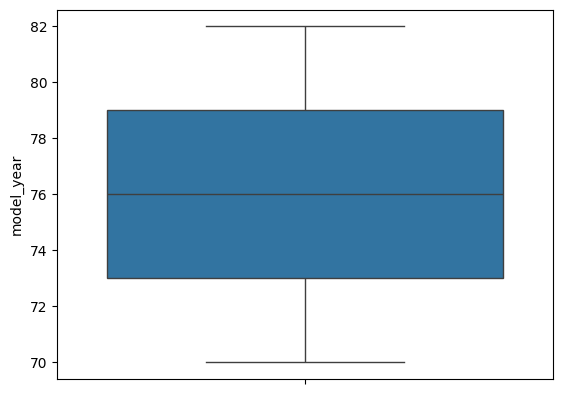

In [14]:
for col in data.columns:
    boxplot(data[col])
    plt.show()

mpg, horsepower and acceleration have some outliers. We will handle them by using Winsorize function. It replaces them with the given quantile.

In [15]:
from scipy.stats.mstats import winsorize

<Axes: ylabel='mpg'>

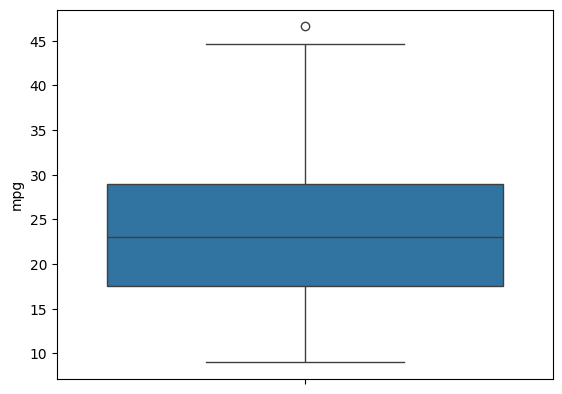

In [16]:
tmp = data['mpg']
boxplot(tmp)

<Axes: >

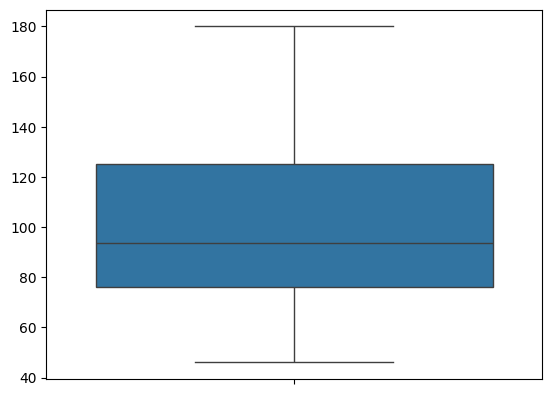

In [17]:
tmp = winsorize(data['horsepower'],limits=[0,0.05])
boxplot(tmp)

In [18]:
data['mpg'] = winsorize(data['mpg'],limits=[0,0.05])

<Axes: ylabel='horsepower'>

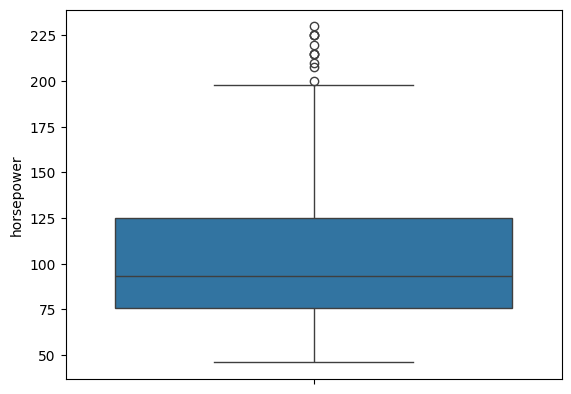

In [19]:
tmp = data['horsepower']
boxplot(tmp)

<Axes: >

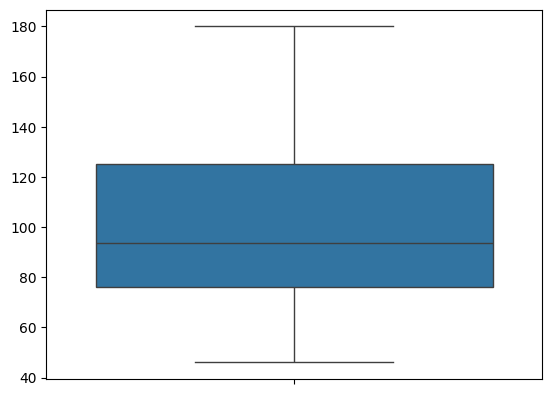

In [20]:
tmp = winsorize(data['horsepower'],limits=[0,0.05])
boxplot(tmp)

In [21]:
data['horsepower'] = winsorize(data['horsepower'],limits=[0,0.05])

<Axes: ylabel='acceleration'>

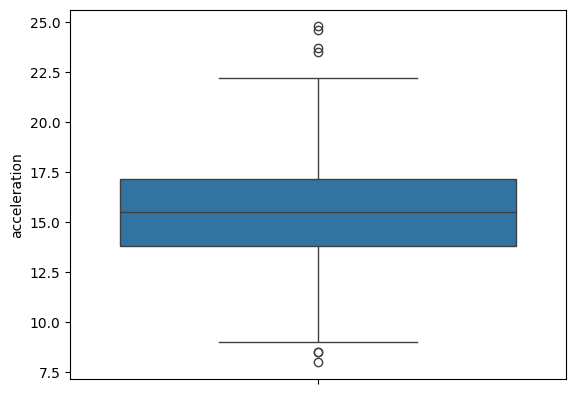

In [22]:
tmp = data['acceleration']
boxplot(tmp)

<Axes: >

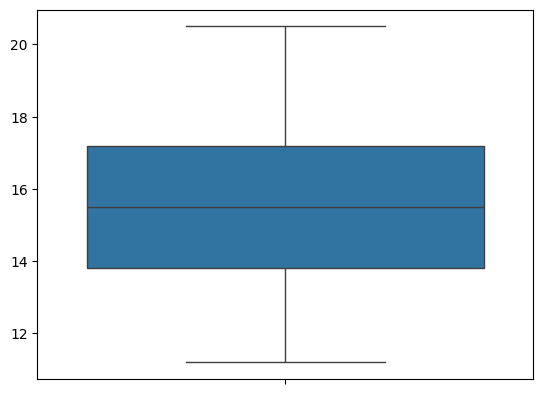

In [23]:
tmp = winsorize(data['acceleration'],limits=[0.05,0.05])
boxplot(tmp)

In [24]:
data['acceleration'] = winsorize(data['acceleration'],limits=[0.05,0.05])

Now we can min-max normalize data.

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
normalized = pd.DataFrame(data=scaler.fit_transform(data),columns=data.columns)
normalized

,mpg,horsepower,weight,acceleration,model_year
0,0.319149,0.626866,0.536150,0.086022,0.0
1,0.212766,0.888060,0.589736,0.032258,0.0
2,0.319149,0.776119,0.516870,0.000000,0.0
3,0.248227,0.776119,0.516019,0.086022,0.0
4,0.283688,0.701493,0.520556,0.000000,0.0
...,...,...,...,...,...
393,0.638298,0.298507,0.333711,0.473118,1.0
394,1.000000,0.044776,0.146583,1.000000,1.0
395,0.815603,0.283582,0.193365,0.043011,1.0
396,0.673759,0.246269,0.286929,0.795699,1.0


We'll use elbow method to find the best number of clusters.

In [27]:
from sklearn.cluster import KMeans

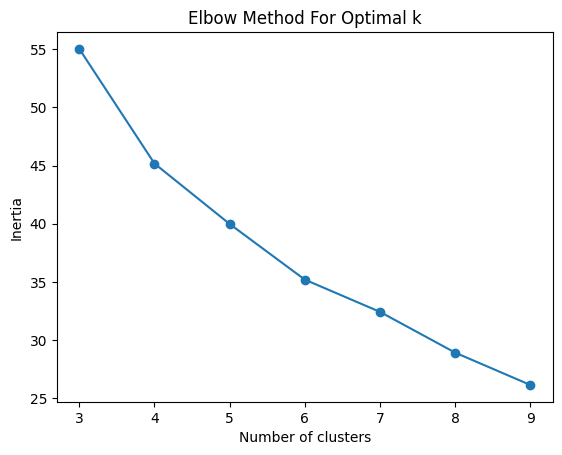

In [28]:
inertias = []

for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, random_state=37)
    kmeans.fit(normalized)
    inertias.append(kmeans.inertia_)

plt.plot(range(3,10), inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
best_k = np.argmax(np.diff(inertias))
best_k

3

In [30]:
model = KMeans(n_clusters = best_k,random_state=37)
model.fit(normalized)

normalized['cluster'] = model.predict(normalized)
normalized

,mpg,horsepower,weight,acceleration,model_year,cluster
0,0.319149,0.626866,0.536150,0.086022,0.0,2
1,0.212766,0.888060,0.589736,0.032258,0.0,2
2,0.319149,0.776119,0.516870,0.000000,0.0,2
3,0.248227,0.776119,0.516019,0.086022,0.0,2
4,0.283688,0.701493,0.520556,0.000000,0.0,2
...,...,...,...,...,...,...
393,0.638298,0.298507,0.333711,0.473118,1.0,0
394,1.000000,0.044776,0.146583,1.000000,1.0,0
395,0.815603,0.283582,0.193365,0.043011,1.0,0
396,0.673759,0.246269,0.286929,0.795699,1.0,0


In [31]:
normalized.groupby('cluster').agg(['mean','std'])

mpg           horsepower              weight            \
             mean       std       mean       std      mean       std   
cluster                                                                
0        0.786834  0.164485   0.242453  0.120522  0.218512  0.124843   
1        0.470633  0.146592   0.338368  0.120155  0.323802  0.160738   
2        0.196953  0.077563   0.824322  0.127901  0.714694  0.127472   

        acceleration           model_year            
                mean       std       mean       std  
cluster                                              
0           0.556634  0.245406   0.829574  0.147889  
1           0.566995  0.209181   0.353293  0.212599  
2           0.179285  0.154035   0.306122  0.239850

In [32]:
normalized.groupby('cluster').size()

cluster
0    133
1    167
2     98
dtype: int64

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA()
pca.fit(normalized.drop(columns=['cluster']))

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(normalized.drop(columns=['cluster']).columns))], index=normalized.drop(columns=['cluster']).columns)
print("Loadings:\n", loadings_df)

Loadings:
                    PC1       PC2       PC3       PC4       PC5
mpg          -0.241875  0.016442 -0.081357  0.066826  0.010435
horsepower    0.243884  0.075619  0.007722  0.042631 -0.038356
weight        0.205096  0.066803  0.093510  0.027513  0.040263
acceleration -0.179024 -0.098414  0.170633  0.020288 -0.013652
model_year   -0.203220  0.225296  0.050155 -0.018482 -0.005789


In [35]:
data['cluster'] = normalized['cluster']
data

,mpg,horsepower,weight,acceleration,model_year,cluster
0,18.0,130.0,3504,12.0,70,2
1,15.0,165.0,3693,11.5,70,2
2,18.0,150.0,3436,11.2,70,2
3,16.0,150.0,3433,12.0,70,2
4,17.0,140.0,3449,11.2,70,2
...,...,...,...,...,...,...
393,27.0,86.0,2790,15.6,82,0
394,37.2,52.0,2130,20.5,82,0
395,32.0,84.0,2295,11.6,82,0
396,28.0,79.0,2625,18.6,82,0


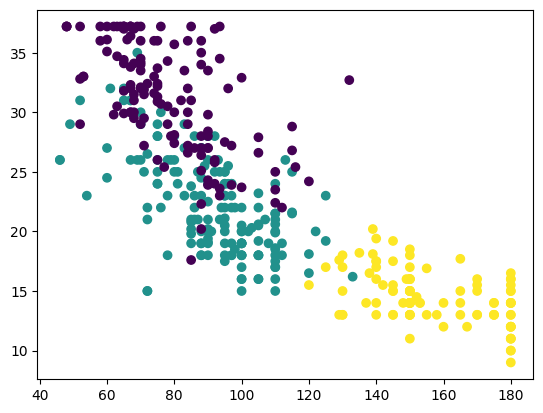

In [36]:
plt.scatter(data=data,x='horsepower',y='mpg',c=data['cluster'])

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
s = silhouette_score(normalized, kmeans.labels_)
print(f"Silhouette score: {s}")

Silhouette score: 0.22199676698845067
